In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


In [12]:
df = pd.read_csv('data/processed/M1_final.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [13]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


<Axes: ylabel='count'>

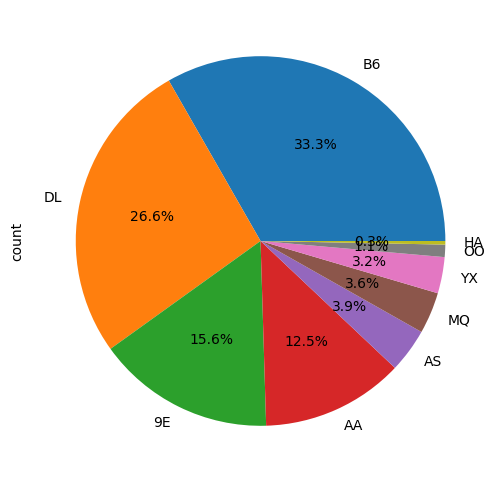

In [14]:
# draw pie chart for unique op carriers
df['OP_UNIQUE_CARRIER'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

## The most frequent carriers are 9E, B6 and DL

In [15]:
df['OP_UNIQUE_CARRIER'].value_counts()

OP_UNIQUE_CARRIER
B6    9589
DL    7680
9E    4485
AA    3595
AS    1111
MQ    1045
YX     914
OO     311
HA      90
Name: count, dtype: int64

In [16]:
# all columns of df
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

,max,min,mean
OP_UNIQUE_CARRIER,,,
9E,729,-20,5.374805
AA,1048,-16,5.450348
AS,621,-19,5.103510
B6,830,-22,8.108979
DL,1199,-16,5.463151
HA,117,-14,0.755556
MQ,599,-14,5.553110
OO,1276,-14,16.639871
YX,1148,-15,3.935449


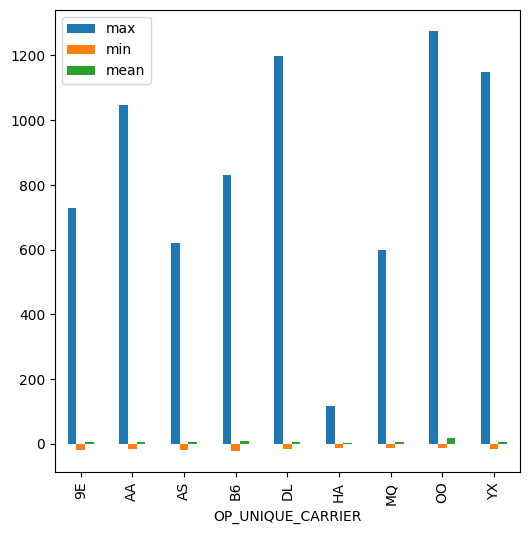

In [17]:
# maximum minimum and mean delay time for each carrier
df.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].agg(['max', 'min', 'mean']).plot(kind='bar', figsize=(6,6))
df.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].agg(['max', 'min', 'mean'])



In [18]:
# Label encoding for OP_UNIQUE_CARRIER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['OP_UNIQUE_CARRIER'] = le.fit_transform(df['OP_UNIQUE_CARRIER'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'9E': 0, 'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'HA': 5, 'MQ': 6, 'OO': 7, 'YX': 8}


In [19]:
#corr with wind gust and wind speed and dep delay
df[['DEP_DELAY', 'Wind Gust', 'Wind Speed','Temperature','Pressure','Dew Point','Humidity']].corr()


,DEP_DELAY,Wind Gust,Wind Speed,Temperature,Pressure,Dew Point,Humidity
DEP_DELAY,1.000000,0.044340,0.067718,-0.032261,-0.064939,-0.000013,-0.011776
Wind Gust,0.044340,1.000000,0.698795,-0.039487,-0.186249,-0.163160,-0.106828
Wind Speed,0.067718,0.698795,1.000000,0.010603,-0.309978,-0.142122,-0.110274
Temperature,-0.032261,-0.039487,0.010603,1.000000,-0.376730,0.787864,0.054401
Pressure,-0.064939,-0.186249,-0.309978,-0.376730,1.000000,-0.489134,0.033677
Dew Point,-0.000013,-0.163160,-0.142122,0.787864,-0.489134,1.000000,0.195262
Humidity,-0.011776,-0.106828,-0.110274,0.054401,0.033677,0.195262,1.000000


In [20]:
# Label encoding for conditions and save mapping
le_cond = LabelEncoder()
df['Condition'] = le_cond.fit_transform(df['Condition'])
le_name_mapping_cond = dict(zip(le_cond.classes_, le_cond.transform(le_cond.classes_)))
print(le_name_mapping_cond)

{'Cloudy': 0, 'Cloudy / Windy': 1, 'Drizzle and Fog': 2, 'Fair': 3, 'Fair / Windy': 4, 'Fog': 5, 'Fog / Windy': 6, 'Heavy Rain': 7, 'Heavy Rain / Windy': 8, 'Light Drizzle': 9, 'Light Drizzle / Windy': 10, 'Light Freezing Rain': 11, 'Light Rain': 12, 'Light Rain / Windy': 13, 'Light Snow': 14, 'Light Snow / Windy': 15, 'Mostly Cloudy': 16, 'Mostly Cloudy / Windy': 17, 'Partly Cloudy': 18, 'Partly Cloudy / Windy': 19, 'Rain': 20, 'Rain / Windy': 21, 'Snow': 22, 'Wintry Mix': 23, 'Wintry Mix / Windy': 24}


In [21]:
#how many conditions have windy in it
df['Condition'].value_counts()
# remove label encoding
df['Condition_unencoded'] = le_cond.inverse_transform(df['Condition'])
df['Condition_unencoded'].value_counts()

Condition_unencoded
Mostly Cloudy            9124
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy              918
Partly Cloudy / Windy     582
Rain                      351
Cloudy / Windy            341
Light Rain / Windy        288
Light Drizzle             194
Fog                       147
Wintry Mix                 83
Light Snow                 76
Heavy Rain                 54
Fog / Windy                28
Rain / Windy               25
Light Snow / Windy         24
Light Drizzle / Windy      18
Heavy Rain / Windy          6
Drizzle and Fog             5
Light Freezing Rain         4
Wintry Mix / Windy          4
Snow                        2
Name: count, dtype: int64

,max,min,mean
Condition_unencoded,,,
Cloudy,1048,-22,5.316106
Cloudy / Windy,372,-15,18.695015
Drizzle and Fog,7,-7,-3.000000
Fair,830,-18,6.032553
Fair / Windy,1276,-15,9.896514
Fog,132,-13,2.639456
Fog / Windy,390,-11,25.892857
Heavy Rain,325,-9,35.611111
Heavy Rain / Windy,50,-19,1.166667


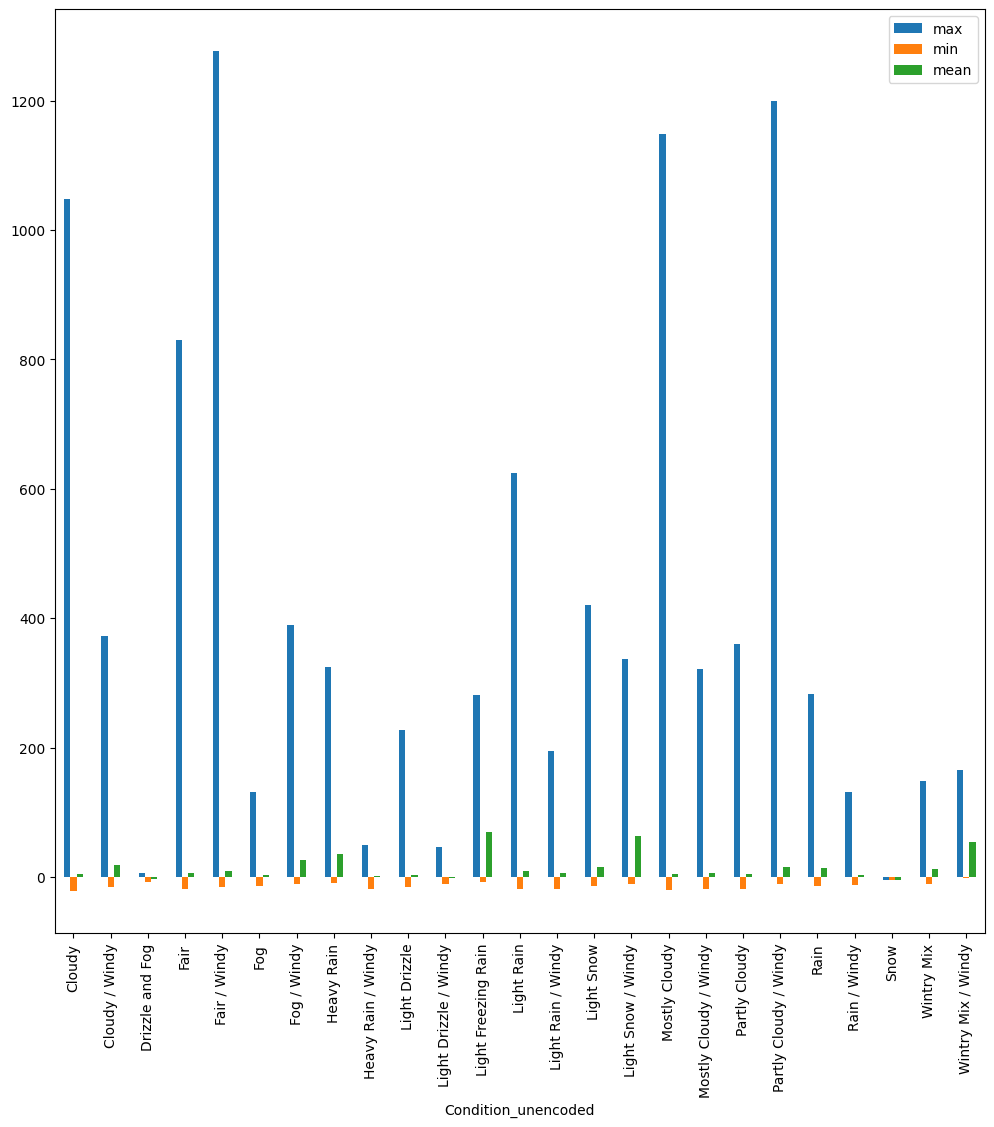

In [22]:
# plot dep delay vs condition min max and mean and create a table too
df.groupby('Condition_unencoded')['DEP_DELAY'].agg(['max', 'min', 'mean']).plot(kind='bar', figsize=(12,12))
df.groupby('Condition_unencoded')['DEP_DELAY'].agg(['max', 'min', 'mean'])

In [23]:
#which condition has the most mean delay time
df.groupby('Condition_unencoded')['DEP_DELAY'].agg(['max', 'min', 'mean']).sort_values(by='mean', ascending=False)

,max,min,mean
Condition,,,
11,281,-7,70.000000
15,337,-10,63.625000
24,165,-2,54.750000
7,325,-9,35.611111
6,390,-11,25.892857
1,372,-15,18.695015
19,1199,-11,15.950172
14,421,-14,15.144737
20,283,-13,14.495726


This means usually long delay happens due to 11,15,24 which are light freezing rain, light snow with wind and wintry mix/windy